In [1]:
from __future__ import division
import cPickle as pkl
import matplotlib.pyplot as plt
from multiprocessing import Pool
import numpy as np
import os
import pandas as pd
from tqdm import tqdm
%matplotlib inline

# Quick inspection

In [2]:
cc = pkl.load(open('../tmp/dump_2009_class_1__raw_data_.pkl','rb'))
rd, ei = cc['raw_data'], cc['extra_info']

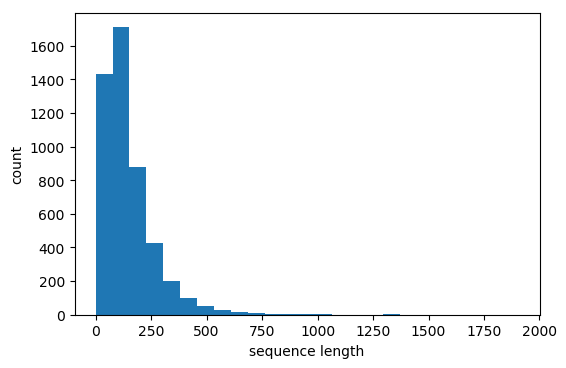

In [3]:
lenghts = [len(rd[k]) for k in rd.keys()]

plt.figure(dpi=100)
plt.hist(lenghts, bins=25)
plt.xlabel('sequence length')
plt.ylabel('count');

In [6]:
for i, k in enumerate(rd.keys()):
    print('* {}'.format(rd[k]))
    if i>3: break

* T0G0T0G1T0G2G0T2G0T2T0G0T0G2T0G2T0G1P0T0P0G0P0P0P0P0T0B0T0P0P0P0I0P0G0T0B0T0P0P0T0G0I0I0I0I0B0T0T0G1P0P0B0P0P0I1G0T0T0G0B0T0G0P0P0G0T0B0E0E0P0P
* O0O2G3P0P0P0P0G2P0P0G0P0G0T0G3G0G0E1E0S0S0S0G2G0E0E0S0P0P0S0I0G1P0P
* G0T0P0P0P0P0G0T1O0T0G0E0T0T0G0G0T0T0G1L0G0T0S0E0S0G0T0T0G1O0T0G3T0P0P0G0P0L0O0T0G0T0T1T0G0P0P0T0P0I0E0E0G0T0O0I0E0S0G0T0G0T0P0P0P0P0E0G0T0G0T0T0G0L0L0L0L0L0L0E0L0L0L0T0G0T0G0G0G0T0T1G0T0O0L0G0T0G0T0E0P0P0P0P0G0T0E0G0T0O0T0G0T0G0T0G0G0T0T0G0G0T0D0T0G0T0E0P0P0P0P0T0G0O0G0G0T0T0T0G0L0T0L0G0L0L0G0T0O0E0E0P0P0P0P0P0T0G0P0P0T0G1G0T0G0T0G0T0G0T0O0G0T0O
* T0G0P0P0T0E0P0P0G0T0I2G0T2T0G0P0P0P0P0P0P0E0P0P0P0T0G0P0P0T0P0P0E0E0S0S0E0E0E1T0G0G0T0E1E0E0P0P0P0P0E2E0T0G0G0T0P0P0P0P0P0P0P0P1E0I0I0G0T0I0T0G1T0G1E0I0T0G0P0T0G0P
* G0T0G0T0E0G0T0G0T0G0T0T0G2G0T1T0G0G0T0P0T0G0P0P0P0P0P0G0T0T0G2G0T1T0G0T0G0T0G0T0G0T0G0T0G0G0T0E0S0T0G1T0G2G0T2T0G0T0G0P0P0T0G0G0T0T0G2T0G0T0G2G0T0P0P0P0P0G0P0P0P0T1G0T2G0T1T0G0G0T1T0G


# Load raw data

In [ ]:
def load_data(dump_files):
    """Extract sequences, extra info and patient id from dump pkl."""
    # Positive raw data load
    raw_data = []
    extra_info = []
    indexes = []
    for f in tqdm(dump_files, desc='Loading dump files'):
        _tmp = pkl.load(open(os.path.join('..', 'tmp', f), 'rb'))
        _raw_data, _extra_info = _tmp['raw_data'], _tmp['extra_info'].set_index('PIN')
        for k in _extra_info.index:
            if len(_raw_data[k])>0: # Skip empty sequences
                raw_data.append(_raw_data[k])
                extra_info.append([_extra_info.loc[k]['SEX'], _extra_info.loc[k]['AGE']])
                indexes.append(k)
            else:
                print('empty {}'.format(k))
    return raw_data, extra_info, indexes

In [ ]:
dump_files = filter(lambda x: 'raw_data' in x, os.listdir('../tmp/'))
positive_dump_files = filter(lambda x: 'class_1' in x, dump_files)
negative_dump_files = filter(lambda x: 'class_0' in x, dump_files)

Sequences should be like `['A', 8, 'M', 0, ...]` where letters are btos and numbers are weeks from one btos to another

In [ ]:
pos_raw_data, pos_extra_info, pos_id = load_data(positive_dump_files)
print(len(pos_id), 'positive samples')

In [ ]:
neg_raw_data, neg_extra_info, neg_id = load_data(negative_dump_files)
print(len(neg_id), 'negative samples')

# EDA

In [ ]:
lenghts = np.array([len(x) for x in pos_BTOS_seq])
pos_idx595 = np.argwhere(np.logical_and(lenghts>=np.percentile(lenghts, 5), lenghts<=np.percentile(lenghts, 95))).ravel()
pos_lenghts = lenghts[pos_idx595]

plt.figure(dpi=100)
plt.hist(pos_lenghts, bins=25)
plt.xlabel('sequence length')
plt.ylabel('count');

In [ ]:
lenghts = np.array([len(x) for x in neg_BTOS_seq])
neg_idx595 = np.argwhere(np.logical_and(lenghts>=np.percentile(lenghts, 5), lenghts<=np.percentile(lenghts, 95))).ravel()
neg_lenghts = lenghts[neg_idx595]

plt.figure(dpi=100)
plt.hist(neg_lenghts, bins=25)
plt.xlabel('sequence length')
plt.ylabel('count');

In [ ]:
import pandas as pd
imap = pd.read_csv('../mbspbs10pc/data/imap.tsv', sep='\t', header=0, usecols=['ITEM', 'BTOS'])
imap.head()

In [ ]:
btos = pd.read_csv('../mbspbs10pc/data/btos_details.csv', header=0)
btos.head()

In [ ]:
tmp = pd.merge(imap, btos, left_on='BTOS', right_on='BTOS (Heirarchy order)', how='left')[['ITEM', 'BTOS_x', 'BTOS_y']]
tmp = tmp.rename({'BTOS_y': 'BTOS', 'BTOS_x': 'BTOS (Heirarchy order)'}, axis=1)
tmp.head()

In [ ]:
tmp.to_csv('../mbspbs10pc/data/imap_derived.csv')

In [ ]:
str('a')

In [ ]:
''.join([])